In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("merge_distance_intensity.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'vdcmun_id', 'building_id', 'district_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'Distance.from.Epicentre', 'Intensity'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

df["damage_grade"] = df["damage_grade"].str.replace("Grade ", "")
df["damage_grade"] = df["damage_grade"].astype(int)
rubble = ["Damaged-Rubble unclear", "Damaged-Rubble clear", "Damaged-Rubble Clear-New building built"]
damage = ["Damaged-Used in risk", "Damaged-Repaired and used", "Damaged-Not used"]
landslide = "Covered by landslide"
nd = "Not damaged"

df["condition_post_eq"] = df["condition_post_eq"].replace(rubble, 2)
df["condition_post_eq"] = df["condition_post_eq"].replace(damage, 1)
df["condition_post_eq"] = df["condition_post_eq"].replace(landslide, 3)
df["condition_post_eq"] = df["condition_post_eq"].replace(nd, 0)

df["land_surface_condition"] = df["land_surface_condition"].replace("Flat", 0)
df["land_surface_condition"] = df["land_surface_condition"].replace("Moderate slope", 1)
df["land_surface_condition"] = df["land_surface_condition"].replace("Steep slope", 2)

df["foundation_type"] = df["foundation_type"].replace("Other",0)
df["foundation_type"] = df["foundation_type"].replace("Mud mortar-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Cement-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Bamboo/Timber",3)
df["foundation_type"] = df["foundation_type"].replace("RC",2)

df["roof_type"] = df["roof_type"].replace("RCC/RB/RBC",0)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Light roof",1)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Heavy roof",2)

df["ground_floor_type"] = df["ground_floor_type"].replace("Mud",1)
df["ground_floor_type"] = df["ground_floor_type"].replace("Brick/Stone",2)
df["ground_floor_type"] = df["ground_floor_type"].replace("RC",3)
df["ground_floor_type"] = df["ground_floor_type"].replace("Timber",4)
df["ground_floor_type"] = df["ground_floor_type"].replace("Other",0)

df["other_floor_type"] = df["other_floor_type"].replace("Not applicable",0)
df["other_floor_type"] = df["other_floor_type"].replace("TImber/Bamboo-Mud",3)
df["other_floor_type"] = df["other_floor_type"].replace("Timber-Planck",2)
df["other_floor_type"] = df["other_floor_type"].replace("RCC/RB/RBC",1)

df["position"] = df["position"].replace("Not attached",0)
df["position"] = df["position"].replace("Attached-1 side",1)
df["position"] = df["position"].replace("Attached-2 side",2)
df["position"] = df["position"].replace("Attached-3 side",3)

df = pd.get_dummies(data = df, columns = ["plan_configuration"])



In [7]:
X = df[['count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape', "Intensity"]]
y = df["damage_grade"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train,y_train)

In [37]:
clf_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.59      0.67      0.63     13537
           2       0.35      0.26      0.30     14523
           3       0.38      0.33      0.35     23075
           4       0.45      0.42      0.43     31780
           5       0.65      0.74      0.70     49342

    accuracy                           0.53    132257
   macro avg       0.48      0.49      0.48    132257
weighted avg       0.52      0.53      0.52    132257

Accuracy: 0.5337940524887151
Misclassification Rate: 0.46620594751128486
Precision: 0.5337940524887151
Recall: 0.5337940524887151
F-measure: 0.5337940524887151


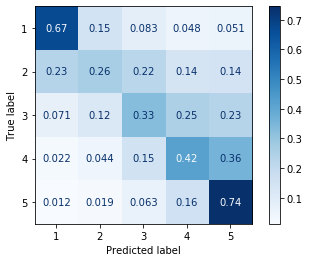

In [38]:
print(classification_report(y_test, clf_pred))
# Accuracy - Multinomial 
accuracy_clf = accuracy_score(y_test,clf_pred)
print("Accuracy:", accuracy_clf)

#Misclassification rate 
misclassified_clf = 1 - accuracy_clf
print("Misclassification Rate:", misclassified_clf)

# Precision and Recall
precision_clf = metrics.precision_score(y_test,clf_pred, average = 'micro')
recall_clf = metrics.recall_score(y_test, clf_pred, average = 'micro')
f_measure_clf = metrics.f1_score(y_test, clf_pred, average = 'micro')
print("Precision:",precision_clf)
print("Recall:",recall_clf)
print("F-measure:",f_measure_clf)
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize="true")